In [7]:
import gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import rioxarray as rxr
from osgeo import gdal
from xarray.ufuncs import logical_or  as xr_or
import yaml
from datetime import datetime

Selecting Bands:    

In [8]:
# Directory with Landsat scene data
landsat_folder = '/home/spatialdays/Documents/ARD_Data/ARD_Landsat/ScaleValues/Scaled/LC08_L2SR_082071_20211126_tmp_2/LC08_L2SR_082071_20211126/'
#landsat_folder = '/home/spatialdays/Documents/ARD_Data/ARD_Landsat/ScaleValues/Scaled/LE07_L2SP_086067_20060427_tmp/LE07_L2SP_086067_20060427/'

# Select the green and nir bands for NDWI
green_cog = landsat_folder + 'LC08_L2SR_082071_20211126_20211201_02_T1_SR_B3.tif'
nir_cog = landsat_folder + 'LC08_L2SR_082071_20211126_20211201_02_T1_SR_B5.tif'

# Select the QA Pixel Band
qa_band = landsat_folder + 'LC08_L2SR_082071_20211126_20211201_02_T1_QA_PIXEL.tif'
#qa_band = landsat_folder + 'LE07_L2SP_086067_20060427_20200914_02_T1_QA_PIXEL.tif'


Running NDWI and Thresholding

In [9]:
def NDWI(green_cog, nir_cog, o_path=None):
    """
    Calculates the Normalized Difference Water Index (NDWI) for Landsat data.
    NDWI = (Green - NIR) / (Green + NIR)
    Values should be in the range [-1,1] for valid LANDSAT data (the bands are positive).
    """

    # Read cogs as xarray datasets
    green = rxr.open_rasterio(green_cog)
    nir = rxr.open_rasterio(nir_cog)

    # Calculate NDWI
    ndwi = (green - nir) / (green + nir)

    # Write NDWI to COG
    if o_path is not None:
        ndwi.rio.to_raster(o_path)

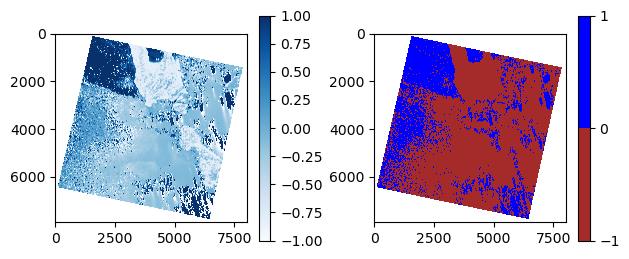

In [11]:
# Output path for NDWI
ndwi_path = 'ndwi_test.tif'

# Run NDWI function
NDWI(green_cog, nir_cog, o_path=ndwi_path)

# Read the NDWI data as an array
ndwi = gdal.Open(ndwi_path)
ndwi_data = ndwi.ReadAsArray()

# Create the figure and plot the NDWI data
fig, axs = plt.subplots(1, 2)


# Visualize NDWI
ndwi_im = axs[0].imshow(ndwi_data, cmap='Blues', vmin=-1, vmax=1)
plt.colorbar(ndwi_im, ax=axs[0], shrink=0.5)

# Define the custom colormap
colors = ['brown', 'blue']
cmap = plt.cm.colors.ListedColormap(colors)

# Define the bounds for colormap normalization
bounds = [-1, 0, 1]

# Normalize the colormap
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N, clip=True)

# Visualize the thresholded NDWI
thresh_im = axs[1].imshow(ndwi_data, cmap=cmap, norm=norm)
plt.colorbar(thresh_im, ax=axs[1], shrink=0.5)

plt.tight_layout()
